In [3]:
# Evaluate using Cross Validation
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/pima-indians-diabetes.csv')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df.columns = names
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [38]:
df.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [40]:
df.skin.value_counts()

,count
skin,
0,227
32,31
30,27
27,23
23,22
33,20
28,20
18,20
31,19


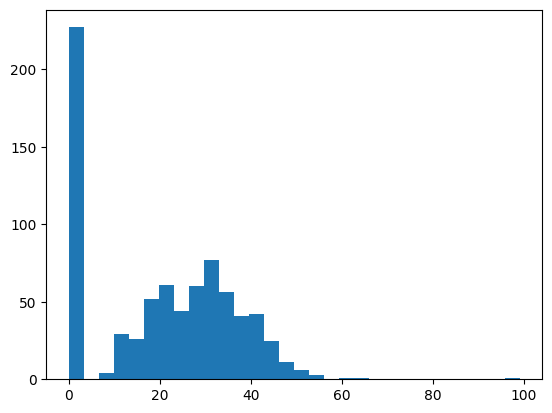

In [43]:
plt.hist(df['skin'], bins=30)
plt.show()

In [46]:
 skin_cl = df.drop(df[df['skin'] == 0].index)

In [47]:
skin_cl.mean()

,0
preg,3.507407
plas,119.770370
pres,71.196296
skin,29.142593
test,113.492593
mass,32.772593
pedi,0.504624
age,31.524074
class,0.331481


In [45]:
df.skin_cl = df.skin()

23.0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
plas,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
pres,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
skin,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
test,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
mass,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
pedi,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
class,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


<Axes: >

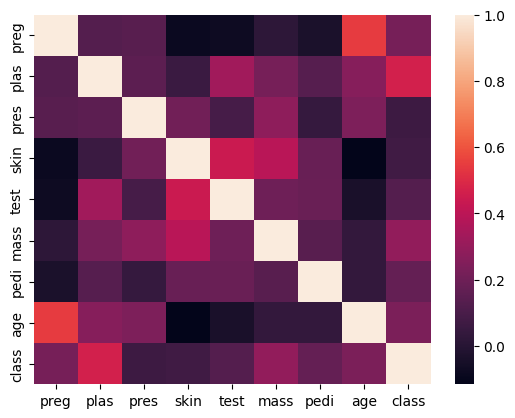

In [18]:
sns.heatmap(df.corr())

<Axes: xlabel='class'>

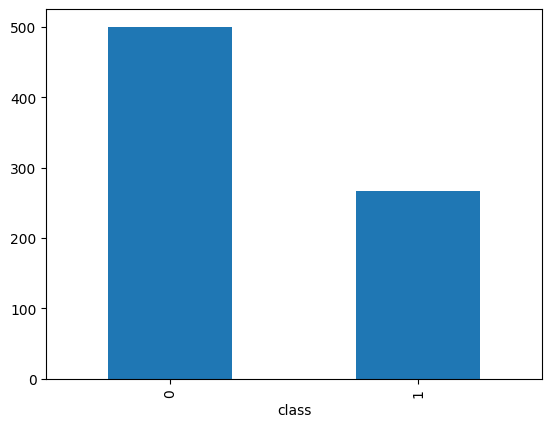

In [8]:
df['class'].value_counts().plot(kind='bar')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [10]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.198% (6.766%)


In [12]:
# Evaluate using Leave One Out Cross Validation
from pandas import read_csv
from sklearn.model_selection import LeaveOneOut

In [13]:

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.923% (42.133%)


## Data Standardization

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.33, random_state=1)

In [31]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [32]:
X_train_sc = scaler.transform(X_train)

In [33]:
X_train_sc.shape, y_train.shape

((513, 8), (513,))

In [37]:
results_sc = cross_val_score(model, X_train_sc, y_train, cv=kfold)
results_sc.mean()

0.7778280542986427

In [36]:

print("Accuracy: %.3f%% (%.3f%%)" % (results_sc.mean()*100.0, results_sc.std()*100.0))

Accuracy: 77.783% (7.662%)
